In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [107]:
df = pd.read_csv('Loan3aDf_not_meet_status.csv')

In [108]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,file_name,time_stamp
0,642818,822719.0,2950.0,2950.0,2950.000000,60 months,15.95%,71.66,E,E1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,LoanStats3a,2017-04-05 20:34:29
1,641659,821359.0,20000.0,20000.0,16466.109187,60 months,19.66%,526.11,G,G1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,LoanStats3a,2017-04-05 20:34:29
2,641638,821336.0,3500.0,3500.0,3500.000000,60 months,15.57%,84.32,D,D5,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,LoanStats3a,2017-04-05 20:34:29
3,641193,820773.0,5000.0,5000.0,5000.000000,36 months,15.20%,173.82,D,D4,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,LoanStats3a,2017-04-05 20:34:29
4,641066,820620.0,2500.0,2500.0,2500.000000,60 months,14.83%,59.26,D,D3,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,LoanStats3a,2017-04-05 20:34:29


In [109]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns

In [115]:
missing_values_table(df)

,Missing Values,% of Total Values
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [111]:
## dropping below columns as they all have 100% null values.

del df['emp_title']
del df['desc']
del df['mths_since_last_delinq']
del df['mths_since_last_record']
del df['mo_sin_rcnt_tl']
del df['mort_acc']
del df['mths_since_recent_bc']
del df['mths_since_recent_bc_dlq']
del df['mths_since_recent_inq']
del df['mths_since_recent_revol_delinq']
del df['num_accts_ever_120_pd']
del df['num_actv_bc_tl']
del df['num_actv_rev_tl']
del df['num_bc_sats']
del df['num_bc_tl']
del df['num_il_tl']
del df['num_op_rev_tl']
del df['num_rev_accts']
del df['num_rev_tl_bal_gt_0']
del df['num_sats']
del df['num_tl_120dpd_2m']
del df['num_tl_30dpd']
del df['num_tl_90g_dpd_24m']
del df['num_tl_op_past_12m']
del df['pct_tl_nvr_dlq']
del df['percent_bc_gt_75']
del df['tot_hi_cred_lim']
del df['total_bal_ex_mort']
del df['total_bc_limit']
del df['total_il_high_credit_limit']

del df['tot_coll_amt']
del df['tot_cur_bal']
del df['open_acc_6m']
del df['open_il_6m']
del df['open_il_12m']
del df['open_il_24m']
del df['mths_since_rcnt_il']
del df['total_bal_il']
del df['il_util']
del df['open_rv_12m']
del df['open_rv_24m']
del df['max_bal_bc']
del df['all_util']
del df['total_rev_hi_lim']
del df['inq_fi']
del df['total_cu_tl']
del df['inq_last_12m']
del df['acc_open_past_24mths']
del df['avg_cur_bal']
del df['bc_open_to_buy']
del df['bc_util']

del df['mths_since_last_major_derog']
del df['annual_inc_joint']
del df['dti_joint']
del df['verification_status_joint']
del df['mo_sin_old_il_acct']
del df['mo_sin_old_rev_tl_op']
del df['mo_sin_rcnt_rev_tl_op']



In [112]:
df = df[df.delinq_2yrs.notnull()]
df['last_pymnt_d'].fillna(0,inplace=True)
df['collections_12_mths_ex_med'].fillna(0,inplace=True)
df['chargeoff_within_12_mths'].fillna(0,inplace=True)
df['pub_rec_bankruptcies'].fillna(0,inplace=True)
df['tax_liens'].fillna(0,inplace=True)
df['last_credit_pull_d'].fillna(0,inplace=True) # one missing value
df['title'].fillna('unknown',inplace=True)
df['revol_util'].fillna(0,inplace=True)


In [113]:
df['term']=df['term'].str.split(' ',2).str[1]
df['revol_util'] = df['revol_util'].str.split('%',1).str[0]
df['int_rate'] = df['int_rate'].str.split('%',1).str[0]


In [ ]:
print("cleaning done..")

In [117]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,file_name,time_stamp
0,642818,822719.0,2950.0,2950.0,2950.000000,60,15.95,71.66,E,E1,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,LoanStats3a,2017-04-05 20:34:29
1,641659,821359.0,20000.0,20000.0,16466.109187,60,19.66,526.11,G,G1,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,LoanStats3a,2017-04-05 20:34:29
2,641638,821336.0,3500.0,3500.0,3500.000000,60,15.57,84.32,D,D5,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,LoanStats3a,2017-04-05 20:34:29
3,641193,820773.0,5000.0,5000.0,5000.000000,36,15.20,173.82,D,D4,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,LoanStats3a,2017-04-05 20:34:29
4,641066,820620.0,2500.0,2500.0,2500.000000,60,14.83,59.26,D,D3,...,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,LoanStats3a,2017-04-05 20:34:29


In [208]:
df.dtypes

id                              int64
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

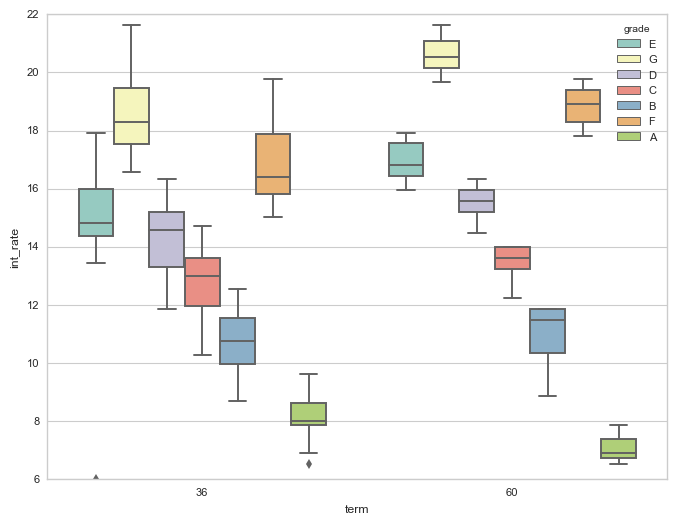

In [246]:
### distribution of interest rate based on grade and term
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="term", y="int_rate",hue='grade',data=df, palette="Set3")

In [299]:
avg_rate = df.groupby(['grade','term','emp_length','loan_status'],as_index=False)['int_rate','loan_amnt','annual_inc'].mean()


In [300]:
avg_rate

,grade,term,emp_length,loan_status,int_rate,loan_amnt,annual_inc
0,A,36,1 year,Does not meet the credit policy. Status:Charge...,9.380000,3000.000000,75000.000000
1,A,36,1 year,Does not meet the credit policy. Status:Fully ...,8.294000,3190.000000,80316.208000
2,A,36,10+ years,Does not meet the credit policy. Status:Fully ...,7.918333,8133.333333,90166.666667
3,A,36,2 years,Does not meet the credit policy. Status:Fully ...,8.409091,5563.636364,88247.363636
4,A,36,3 years,Does not meet the credit policy. Status:Fully ...,8.755000,13000.000000,108000.000000
5,A,36,4 years,Does not meet the credit policy. Status:Fully ...,8.274000,2960.000000,51700.000000
6,A,36,5 years,Does not meet the credit policy. Status:Fully ...,8.051111,7655.555556,89600.444444
7,A,36,6 years,Does not meet the credit policy. Status:Fully ...,8.083333,6200.000000,121666.666667
8,A,36,7 years,Does not meet the credit policy. Status:Charge...,8.155000,11500.000000,66498.000000
9,A,36,7 years,Does not meet the credit policy. Status:Fully ...,8.111429,4842.857143,81361.142857


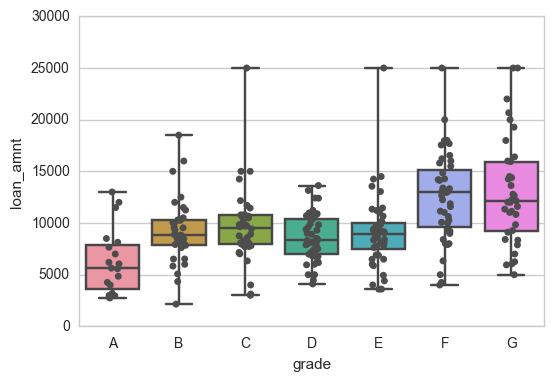

In [213]:
ax = sns.boxplot(x="grade", y="loan_amnt", data=avg_rate, whis=np.inf)
ax = sns.stripplot(x="grade", y="loan_amnt", data=avg_rate,
                    jitter=True, color=".3")

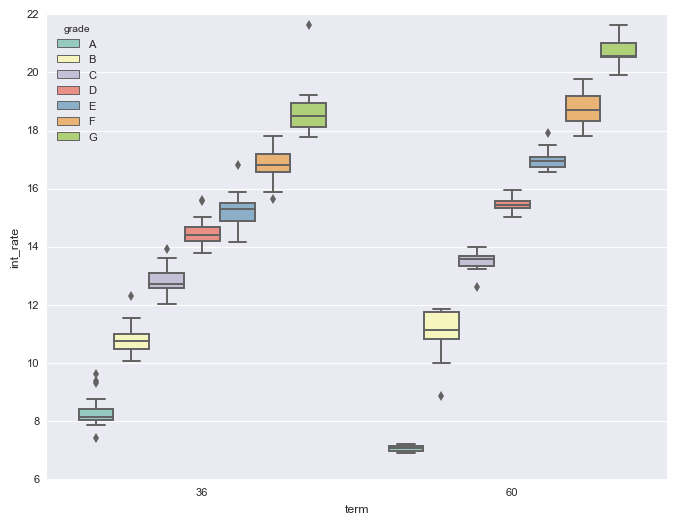

In [245]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="term", y="int_rate",hue='grade',data=avg_rate, palette="Set3")

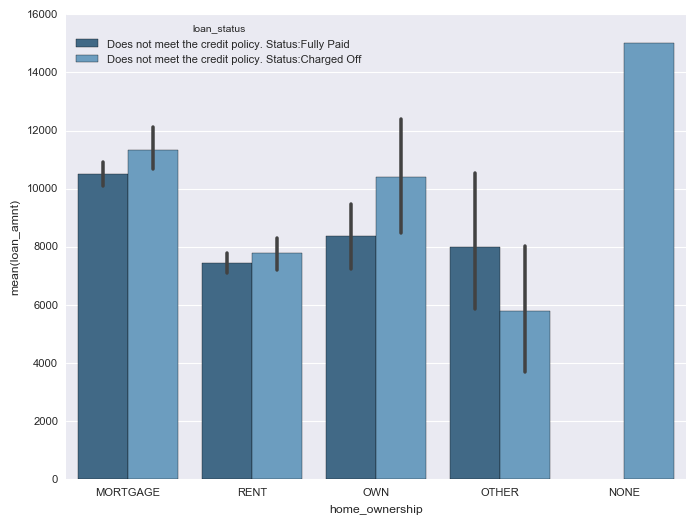

In [244]:
#("size", y="total_bill", data=tips, palette="Blues_d")
#ax = sns.barplot(x="emp_length", y="loan_amnt", hue="loan_status",data=avg_rate, jitter=True, palette="Set2", split=True)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="home_ownership", y="loan_amnt", hue="loan_status",data=df, palette="Blues_d")

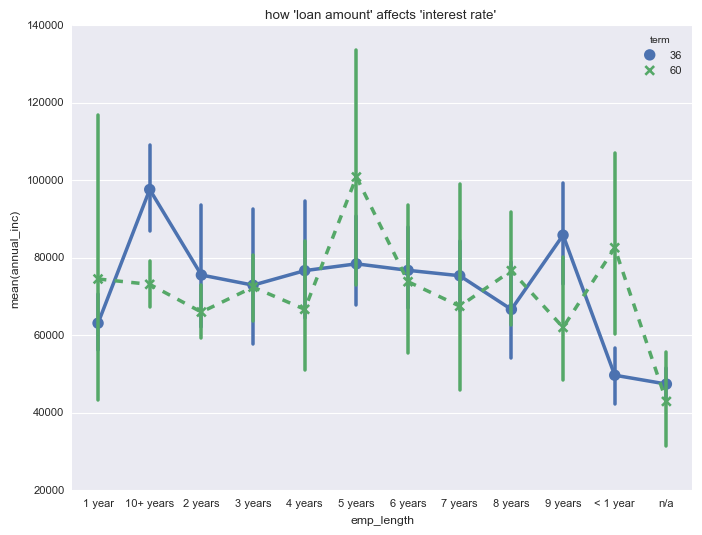

In [301]:
sns.set_context("paper")
plt.figure(figsize=(8, 6))
plt.title("how 'loan amount' affects 'interest rate' ")
ax = sns.pointplot(x="emp_length", y="annual_inc", hue="term",
                    data=avg_rate,
                    markers=["o", "x"],
                    linestyles=["-", "--"])